In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dis_10=pd.read_csv('F:/all_house_senate_2010.csv',encoding='ANSI') 
#named with the last 2 digits of the year

##Since my computer is 32-bit with 2GB RAM, loading other csv files and then running codes 
##on them causes memory error. So I have to give up another 3 files.

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#convert currency 'dis_amo' from string to float for later calculations
dis_10['dis_amo']=dis_10['dis_amo'].replace('[\$,]', '', regex=True).astype(float)

#filling missing data of dis_amo with mean
dis_10['dis_amo']=dis_10['dis_amo'].fillna(value=dis_10['dis_amo'].mean())

# Average disbursement by states in 2010

In [5]:
df1=dis_10[['can_off_sta','dis_amo']]

#index 'dis_amo' with states, group them and calculate average expenditures by states
df2=df1.set_index('can_off_sta').groupby('can_off_sta').mean() 

In [6]:
mean=df2['dis_amo'].mean() #the average amount of disbursement

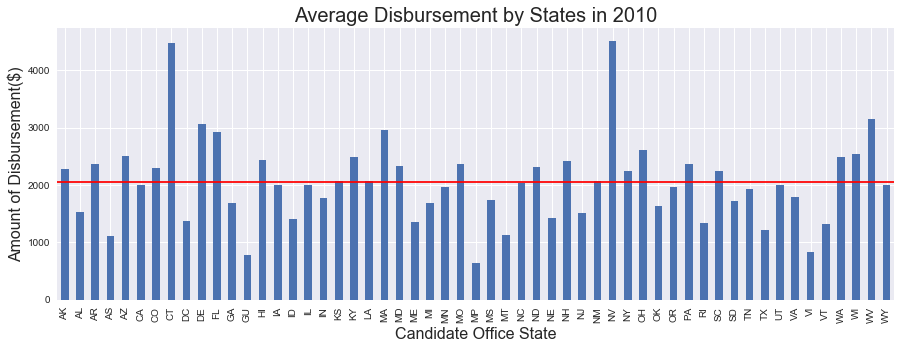

In [7]:
df2.plot.bar(figsize=(15,5),legend=None);plt.axhline(mean,color='red') 
#the red line indicates nationwide average disbursement 

plt.xlabel('Candidate Office State',fontsize=16)
plt.ylabel('Amount of Disbursement($)',fontsize=16)
plt.title('Average Disbursement by States in 2010',fontsize=20)

# Distribution of disbursement by months in 2010

In [41]:
#extract disbursement month from column dis_dat
dis_10['month']=dis_10['dis_dat'].str[5:7]
#remove the '0' of months that have only one digit: e.g. '01' -> '1'
dis_10.month.replace(['01','02', '03','04','05','06','07', '08','09'],
                     ['1','2','3','4','5','6','7','8','9',],inplace=True)

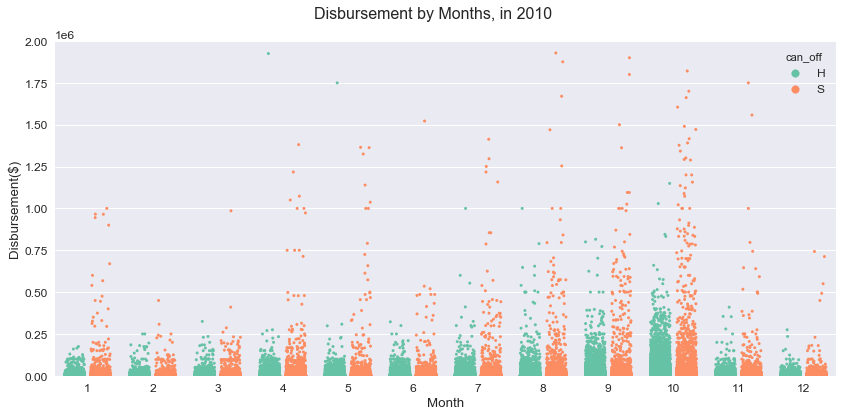

In [43]:
fig,ax=plt.subplots()

#set figure size and font scale
fig.set_size_inches(14,6)
sns.set(font_scale=1.2)

#plot a stripplot
sns.stripplot(x="month", y="dis_amo", hue="can_off",data=dis_10,split=True,jitter=0.3,
              order=['1','2','3','4','5','6','7','8','9','10','11','12'],palette='Set2',
              size=3,ax=ax)

#set axes label
ax.set_xlabel('Month')
ax.set_ylabel('Disbursement($)')

#set yaxis limit to cut the extremely large outlier
plt.ylim(0,2000000)

#use scientific notation for yticks
plt.ticklabel_format(style='sci', axis='y', scilimits=(-1,6))

#add a title to the plot
plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Disbursement by Months, in 2010',fontsize=16)


# Regression of travel and polling expenses:

Is there a correlation between travel expenses and polling expenses?

In [11]:
#first we need to extract 'dis_amo' whose corresponding category is travel
#category code for travel is 002
df3=dis_10[dis_10['cat_cod']=='002'][['com_id','can_off','dis_amo']] 

#create dataframe df_trv
df_trv=df3.groupby(['can_off','com_id'],as_index=False).sum() 
 
#rename 'dis_amo' to 'Travel Expenses' for the purpose of clarity in later merging
df_trv.columns=['can_off','com_id','Travel Expenses']

In [12]:
#next we need to extract 'dis_amo' whose corresponding category is polling
#category code for polling is 005
df4=dis_10[dis_10['cat_cod']=='005'][['com_id','dis_amo']]

df_poll=df4.groupby(['com_id'],as_index=False).sum()

#rename 'dis_amo' to 'Polling Expenses' for the purpose of clarity in later merging
df_poll.columns=['com_id','Polling Expenses']

In [13]:
#merge df_trv and df_poll
merge=pd.merge(df_trv,df_poll,on='com_id')

merge.head()

,can_off,com_id,Travel Expenses,Polling Expenses
0,H,C00165241,51289.03,50100.00
1,H,C00180505,42564.35,93600.00
2,H,C00187419,298855.27,80045.56
3,H,C00195628,3280.05,50000.00
4,H,C00196774,52112.95,85000.00


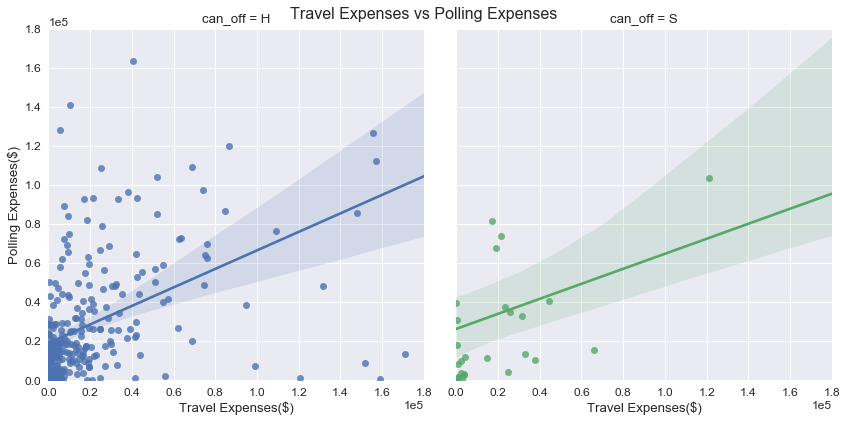

In [14]:
sns.set(font_scale=1.2)
reg=sns.lmplot(x='Travel Expenses',y='Polling Expenses',data=merge,col='can_off',hue='can_off',size=6)

#set axis labels
reg.set_axis_labels(u'Travel Expenses($)','Polling Expenses($)')
#set axis limits and plot title
reg.set(ylim=(0,180000),xlim=(0,180000))

#use scientific notation to replace large numbers on axes
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,5)) 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,5))

#add a title to the plot
plt.subplots_adjust(top=0.8)
sns.plt.suptitle('Travel Expenses vs Polling Expenses',fontsize=16)

plt.tight_layout()

# Is there a correlation between travel expenses and advertising expenses?

In [15]:
#category code for advertising is 004
df5=dis_10[dis_10['cat_cod']=='004'][['com_id','dis_amo']]

df_adv=df5.groupby(['com_id'],as_index=False).sum()
#rename 'dis_amo' to 'Admin Expenses' for the purpose of clarity in later merging
df_adv.columns=['com_id','Ad Expenses']

In [16]:
#merge df_trv and df_adv
merge_TA=pd.merge(df_trv,df_adv,on='com_id')

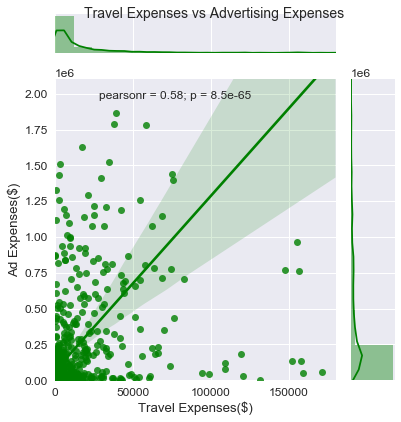

In [17]:
sns.set(font_scale=1.2)

fig1=sns.jointplot(x='Travel Expenses',y='Ad Expenses',data=merge_TA,kind='reg',
              xlim=(0,180000),ylim=(0,2100000),space=-20,color='green')
#set axis labels
fig1.set_axis_labels(u'Travel Expenses($)','Ad Expenses($)')

#use scientific notation to replace large numbers on axes
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,6))

#add a title to the plot
plt.subplots_adjust(left=0.2,bottom=0.01,top=0.4,right=0.8)
sns.plt.suptitle('Travel Expenses vs Advertising Expenses',fontsize=14)

plt.tight_layout()

# Create a pairplot for top 5 categories with most disbursement transactions.

In [18]:
#top 5 categories with most disbursement transactions and their corresponding code
dis_10['cat_des'].value_counts().head(5)

Administrative/Salary/Overhead Expenses     184578
Solicitation and Fundraising Expenses        38218
Travel Expenses                              32501
Advertising Expenses                         23241
Campaign Event Expenses                       9954
Name: cat_des, dtype: int64

In [19]:
dis_10['cat_cod'].value_counts().head(5)

001    184578
003     38218
002     32501
004     23241
007      9954
Name: cat_cod, dtype: int64

In [20]:
#category code for admin, fundraising, and campaign event expenses is 001,003,and 007,respectively.
df6=dis_10[dis_10['cat_cod']=='001'][['com_id','dis_amo']]
df7=dis_10[dis_10['cat_cod']=='003'][['com_id','dis_amo']]
df8=dis_10[dis_10['cat_cod']=='007'][['com_id','dis_amo']]

df_admin=df6.groupby(['com_id'],as_index=False).sum()
df_fund=df7.groupby(['com_id'],as_index=False).sum()
df_camp=df8.groupby(['com_id'],as_index=False).sum()

#rename columns for the purpose of clarity in later merging
df_admin.columns=['com_id','Admin Expenses']
df_fund.columns=['com_id','Fundraising Expenses']
df_camp.columns=['com_id','Camp Expenses']

In [21]:
#merge new dataframes with merge_TA(a previous merging of df_trv and df_adv)
merge_top5=merge_TA.merge(df_admin,on='com_id').merge(df_fund,on='com_id').merge(df_camp,on='com_id')

In [22]:
merge_top5.head()

,can_off,com_id,Travel Expenses,Ad Expenses,Admin Expenses,Fundraising Expenses,Camp Expenses
0,H,C00026757,36900.66,16436.83,122048.66,200674.98,12711.32
1,H,C00051227,69684.21,352134.90,560043.75,29064.78,38845.28
2,H,C00107003,3580.90,40000.00,11971.71,63146.70,250.00
3,H,C00147686,42078.71,11586.24,263014.21,310443.00,14022.33
4,H,C00165241,51289.03,438793.24,772822.25,244633.86,45037.37


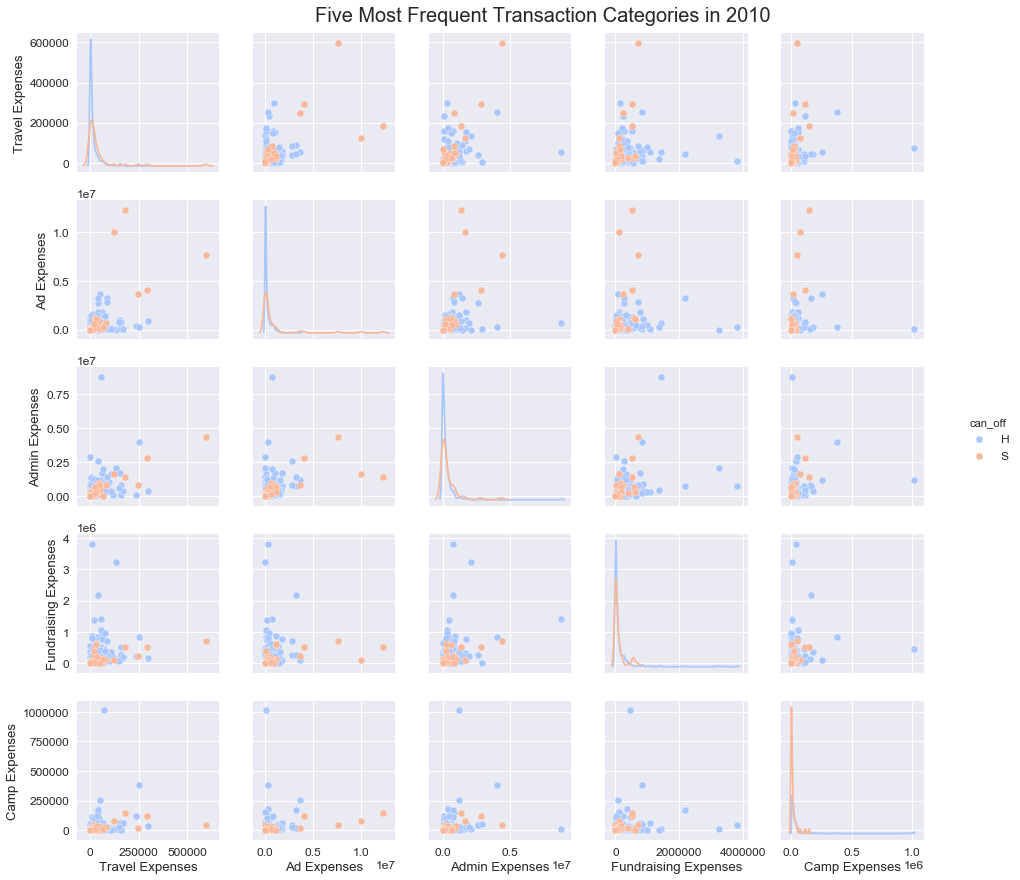

In [23]:
#draw a pairplot
sns.pairplot(merge_top5,hue='can_off',palette='coolwarm',diag_kind='kde')

#use scientific notation to replace large numbers on axes
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,5))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,5))

#add a title to the plot
plt.subplots_adjust(top=0.95,left=0.01,right=0.9)
sns.plt.suptitle('Five Most Frequent Transaction Categories in 2010',fontsize=20)


# Clustermap of average monthly disbursement for these five categories

In [24]:
cl=dis_10[['month','dis_amo','cat_des','cat_cod']]

cl_new=cl.loc[cl['cat_cod'].isin(['001','002','003','004','007'])].groupby(['cat_cod','month','cat_des'],as_index=False).mean()

D:\Anaconda\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


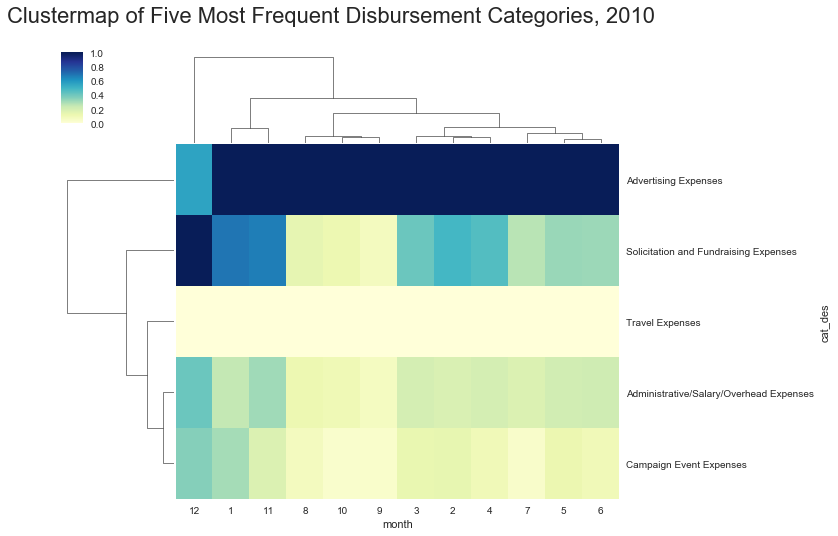

In [25]:
pv=cl_new.pivot_table(values='dis_amo',index='cat_des',columns='month')

sns.set()
g=sns.clustermap(pv,standard_scale=1,figsize=(10,8),cmap='YlGnBu')

#rotate ytickslabels to avoid overlapping
plt.setp(g.ax_heatmap.get_yticklabels(),rotation=0)


#add a title to the plot
plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Clustermap of Five Most Frequent Disbursement Categories, 2010',fontsize=22)

# Comparing disbursement to AT&T, Verizon and T-mobile in Texas in 2010

In [26]:
com=dis_10[['rec_nam','month','dis_amo','rec_sta','can_off']]

In [27]:
#create a dataframe to get info('rec_nam','month','dis_amo','rec_sta') 
#of disbursement recipients in TX
comm=com[com['rec_sta']=='TX']

#replace messing recipient names of AT&T to a uniform 'AT&T'
comm['rec_nam'].replace(['A T & T','ATT','AT& T','AT&T CELL','AT&T DATA','AT&T MOBILE','AT&T MOBILITY','AT&T WIRELESS'],
                        ['AT&T','AT&T','AT&T','AT&T','AT&T','AT&T','AT&T','AT&T'],inplace=True)

#replace messing recipient names of Verizon to a uniform 'VERIZON'
comm['rec_nam'].replace(['VERISON WIRELESS','VERIZON - TX','VERIZON COMMUNICATIONS','VERIZON NORTH','VERIZON SOUTH','VERIZON NORTHWEST','VERIZON DALLAS',
                         'VERIZON - DALLAS','VERIZON WIRELESS','VERIZON WIRELESS-DALLAS','VERIZON FLORIDA','VERIZON SOUTHWEST','VERIZON SRC'],
                        ['VERIZON','VERIZON','VERIZON','VERIZON','VERIZON','VERIZON','VERIZON','VERIZON','VERIZON','VERIZON','VERIZON','VERIZON','VERIZON'],inplace=True)
#replace messing recipient names of T-mobile to a uniform 'T-MOBILE'
comm['rec_nam'].replace(['T MOBILE'],['T-MOBILE'],inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
#a dataframe that contains data of AT&T, VERIZON, and T-MOBILE only
com1=comm.loc[comm['rec_nam'].isin(['AT&T','VERIZON','T-MOBILE'])]

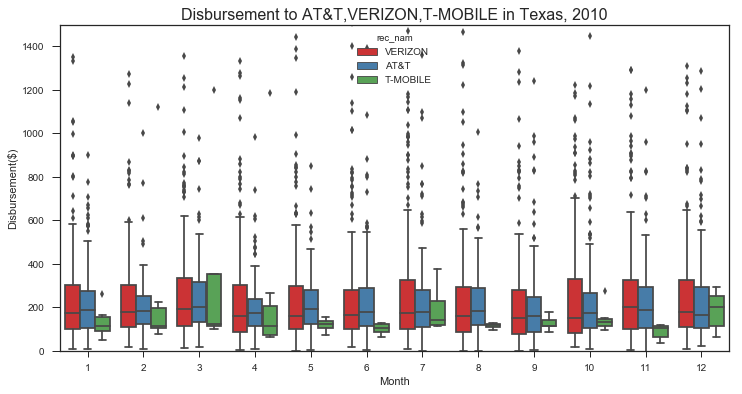

In [31]:
f1,ax1=plt.subplots(figsize=(12,6))

sns.set_style('ticks')
sns.set_style('ticks',{'ytick.major.size':8})
ax=sns.boxplot(x="month", y="dis_amo", data=com1,hue='rec_nam',palette='Set1',
               order=['1','2','3','4','5','6','7','8','9','10','11','12'])

#set axes label
ax1.set_xlabel('Month')
ax1.set_ylabel('Disbursement($)')

#set yaxis limit to cut a few extremely large outliers
plt.ylim(0,1500)

plt.title('Disbursement to AT&T,VERIZON,T-MOBILE in Texas, 2010',fontsize=16)

# Heatmaps for disbursement amount and number of disbursements per month, to AT&T, VERIZON, and T-MOBILE in Texas

In [32]:
#get sum of disbursement amount per month to each company 
com2=com1.groupby(['rec_nam','month'],as_index=False).sum()

#count number of disbursement transactions per month to each company
com3=com1.groupby(['rec_nam','month'],as_index=False).count()

In [33]:
#pivot table com2 and com3
pvcom2 = com2.pivot_table(values='dis_amo',index='month',columns='rec_nam')
pvcom3 = com3.pivot_table(values='dis_amo',index='month',columns='rec_nam')

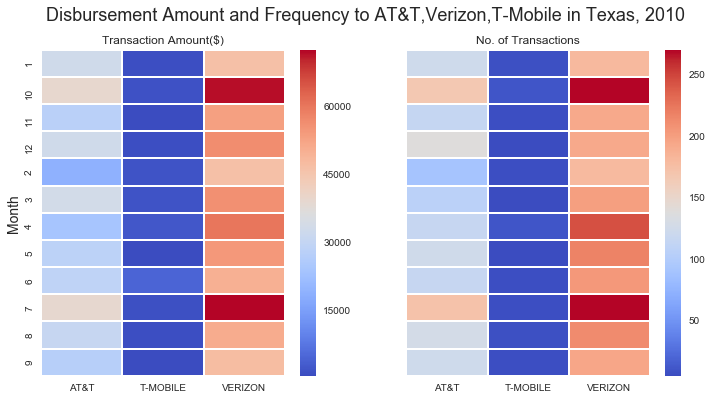

In [34]:
sns.set()

#create heatmaps for disbursement amount and number of disbursements per month
f2,(ax1,ax2)=plt.subplots(figsize=(12,6),ncols=2)

sns.heatmap(pvcom2,linewidths=1,cmap='coolwarm',robust=True,ax=ax1)
ax1.set_title('Transaction Amount($)',fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('Month',fontsize=14)

sns.heatmap(pvcom3,linewidths=1,robust=True,cmap='coolwarm',yticklabels=False,ax=ax2)
ax2.set_title('No. of Transactions',fontsize=12)
ax2.set_ylabel('')
ax2.set_xlabel('')

plt.subplots_adjust(top=0.88)
sns.plt.suptitle('Disbursement Amount and Frequency to AT&T,Verizon,T-Mobile in Texas, 2010',fontsize=18)

# Is there any correlation among candidate office, the mobile company they choose, and disbursement amount?

First let's have a look at the disbusement distribution by candidate office.

In [35]:
can=com1.groupby(['can_off','rec_nam','month'],as_index=False).sum()

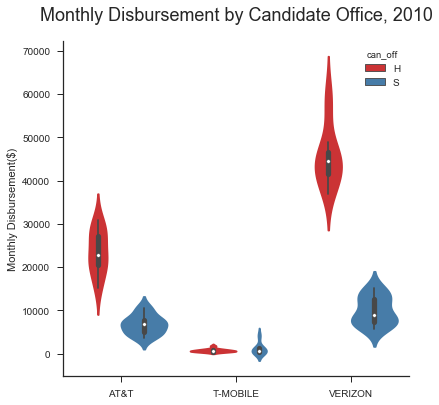

In [36]:
sns.set()
sns.set_style('ticks')

f5,ax5=plt.subplots(figsize=(6,6))
sns.violinplot(y="dis_amo", x="rec_nam", data=can,hue='can_off',palette='Set1')

#set axes label
ax5.set_xlabel('')
ax5.set_ylabel('Monthly Disbursement($)')

#despine
sns.despine(fig=f5,ax=ax5,top=True,right=True)

plt.subplots_adjust(top=0.9,left=0.1)
sns.plt.suptitle('Monthly Disbursement by Candidate Office, 2010',fontsize=18)

Now let's see the correlation among candidate office, mobile company, and the disbursement amount.

In [37]:
can1=com1.groupby(['can_off','rec_nam'],as_index=False).sum()

In [38]:
can1

,can_off,rec_nam,dis_amo
0,H,AT&T,282594.41
1,H,T-MOBILE,8979.11
2,H,VERIZON,546914.77
3,S,AT&T,80888.22
4,S,T-MOBILE,8646.49
5,S,VERIZON,119135.94


In [39]:
#create dummy variables for categorical variables
can2=pd.get_dummies(can1)
can2

,dis_amo,can_off_H,can_off_S,rec_nam_AT&T,rec_nam_T-MOBILE,rec_nam_VERIZON
0,282594.41,1,0,1,0,0
1,8979.11,1,0,0,1,0
2,546914.77,1,0,0,0,1
3,80888.22,0,1,1,0,0
4,8646.49,0,1,0,1,0
5,119135.94,0,1,0,0,1


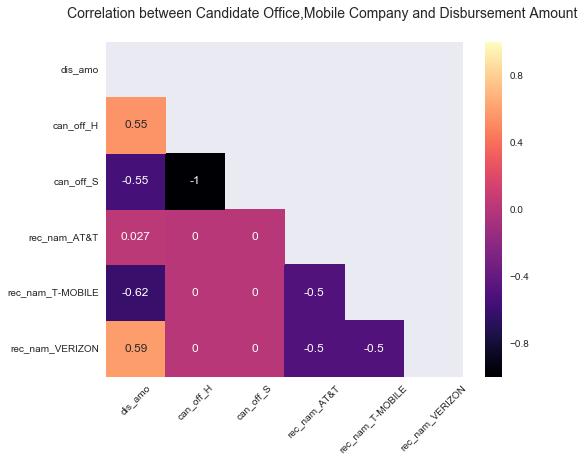

In [40]:
sns.set()
f6,ax6=plt.subplots(figsize=(8,6))

#put a mask to show only partial matrix
mask=np.zeros_like(can2.corr())
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    sns.heatmap(can2.corr(),mask=mask,cmap='magma',annot=True)

#rotate xticks to 45 degree
plt.xticks(rotation=45)

plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Correlation between Candidate Office,Mobile Company and Disbursement Amount',fontsize=14)

# Disbursement comparison between 2010 and 2012

In [44]:
#import csv

###I was intended to import all four csv files for comparison by got 'memory error' because 
###my laptop is 32-bit.

dis_12=pd.read_csv('F:/all_house_senate_2012.csv',encoding='ANSI')

In [45]:
#convert currency 'dis_amo' from string to float for later calculations
dis_12['dis_amo']=dis_12['dis_amo'].replace('[\$,]', '', regex=True).astype(float)

#filling missing data of dis_amo with mean
dis_12['dis_amo']=dis_12['dis_amo'].fillna(value=dis_12['dis_amo'].mean())

In [46]:
#concatenate dis_10 and dis_12
con=pd.concat([dis_10,dis_12])

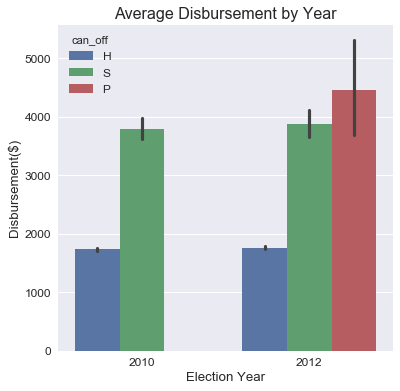

In [47]:
plt.figure(figsize=(6,6))
ax1=sns.barplot(x='ele_yea',y='dis_amo',data=con,hue='can_off')
ax1.set(xlabel='Election Year',ylabel='Disbursement($)')

plt.title('Average Disbursement by Year',fontsize=16)